# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective is to build a predictive model that estimates the price of used cars based on multiple features 
(such as the year of manufacture, region, condition, fuel,size and others). 
We will use historical data on used car sales, where the price is the target variable (dependent variable), and the car attributes (e.g., year, region, condition or other) are the features (independent variables). 
The model aims to identify the relationship between these features and the target variable (price) and predict the price of unseen cars based on these characteristics. 
We will apply techniques such as data preprocessing, feature engineering, and regression algorithms, 
evaluating the model's performance through metrics like Mean Squared Error (MSE), R-squared, and Root Mean Squared Error (RMSE).

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In order to understand data, the below sequential steps will be followed:
1. Load data
2. check and remove duplicate rows
3. Analyze data for missing values and outliers
4. Visualize data for exploratory analysis of relationship between features contributong to the price
   

In [1]:
#Load Libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

,price,year,odometer
count,3.700060e+05,369020.000000,3.665600e+05
mean,8.426751e+04,2011.072758,9.720563e+04
std,1.308502e+07,9.808597,2.118151e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.995000e+03,2008.000000,3.571900e+04
50%,1.425000e+04,2013.000000,8.356050e+04
75%,2.699000e+04,2017.000000,1.333315e+05
max,3.736929e+09,2022.000000,1.000000e+07


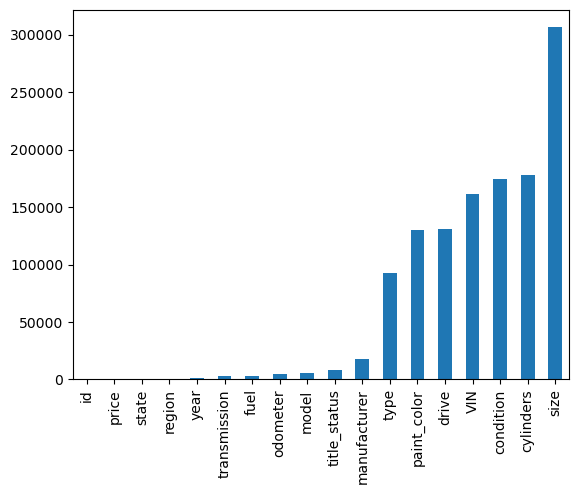

In [3]:
#Load Data
df_vehicle = pd.read_csv("data/vehicles.csv")
df_vehicle.head(10)
df_vehicle.tail(10)

#count missing values
df_vehicle.isnull().sum().sort_values().plot(kind = 'bar')
#Get data info
df_vehicle.info()
#Drop identity columns and repetitive columns(region,state)
df_vehicle1 = df_vehicle.drop(columns=['id','VIN','state'])
#Drop duplicates
df_vehicle1 = df_vehicle1.drop_duplicates()
#descriptive statistics for numerical variables
df_vehicle1.describe()

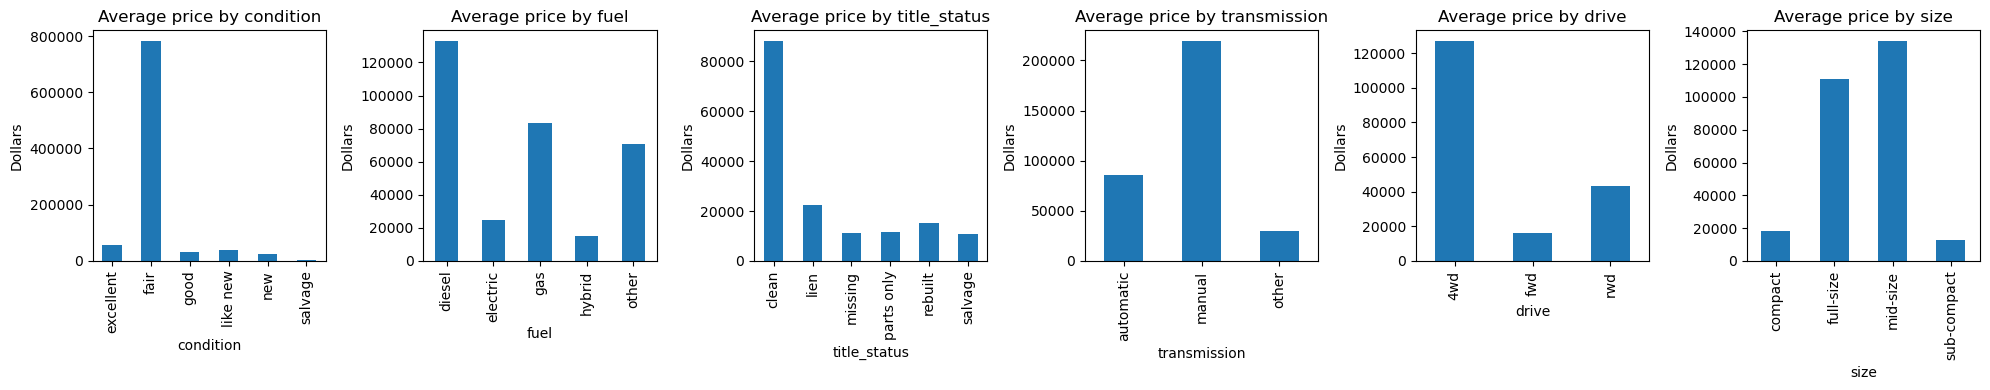

In [5]:
#for visualizing categorical values with minimal unique values
categorical_columns = ['condition','fuel','title_status','transmission','drive','size']
fig, axes = plt.subplots(1, 6, figsize=(20, 4))

for i, column in enumerate(categorical_columns):
    mean_price = df_vehicle1.groupby(column)['price'].mean()
    mean_price.plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Average price by {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Dollars')

plt.tight_layout()
plt.show()

In [9]:
#analyze value count
for column in df_vehicle1.columns:
    print(f"Value counts for column '{column}':")
    print(df_vehicle1[[column]].value_counts(dropna=False))
    print()

Value counts for column 'region':
region               
minneapolis / st paul    2940
seattle-tacoma           2915
portland                 2895
denver                   2874
sacramento               2840
                         ... 
meridian                   28
southwest MS               14
kansas city                11
fort smith, AR              9
west virginia (old)         8
Name: count, Length: 404, dtype: int64

Value counts for column 'price':
price
0        25649
29990     2643
6995      2615
4500      2569
7995      2544
         ...  
7830         1
30526        1
30519        1
30510        1
8751         1
Name: count, Length: 15655, dtype: int64

Value counts for column 'year':
year  
2018.0    32576
2017.0    31234
2015.0    26450
2013.0    25887
2016.0    25787
          ...  
1918.0        1
1915.0        1
1909.0        1
1905.0        1
1902.0        1
Name: count, Length: 115, dtype: int64

Value counts for column 'manufacturer':
manufacturer   
ford             

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [11]:
#convert datatypes and handle missing values
df_vehicle1 = df_vehicle1.convert_dtypes()
cat_columns =  ['condition','fuel','title_status','transmission','drive','manufacturer','model','region','type','paint_color','size','cylinders']
df_vehicle1[cat_columns] = df_vehicle1[cat_columns].fillna('Unknown')
df_vehicle1.info()
# Fill missing values for numerical datatypes
num_columns = df_vehicle1.select_dtypes(include=['float64', 'int64'])

df_vehicle1['year'] = df_vehicle1['year'].fillna(0)
df_vehicle1['odometer'] = df_vehicle1['odometer'].fillna(0)


<class 'pandas.core.frame.DataFrame'>
Index: 370006 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        370006 non-null  string
 1   price         370006 non-null  Int64 
 2   year          369020 non-null  Int64 
 3   manufacturer  370006 non-null  string
 4   model         370006 non-null  string
 5   condition     370006 non-null  string
 6   cylinders     370006 non-null  string
 7   fuel          370006 non-null  string
 8   odometer      366560 non-null  Int64 
 9   title_status  370006 non-null  string
 10  transmission  370006 non-null  string
 11  drive         370006 non-null  string
 12  size          370006 non-null  string
 13  type          370006 non-null  string
 14  paint_color   370006 non-null  string
dtypes: Int64(3), string(12)
memory usage: 46.2 MB


In [13]:
#identify outliers for price column
Q1 = df_vehicle1['price'].quantile(0.25)
Q3 = df_vehicle1['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the range for non-outlier data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
df_vehicle1 = df_vehicle1[(df_vehicle1['price'] > lower_bound) & (df_vehicle1['price'] < upper_bound)]
print("Outliers based on IQR:\n", df_vehicle1)

Outliers based on IQR:
                         region  price  year manufacturer  \
0                     prescott   6000     0      Unknown   
1                 fayetteville  11900     0      Unknown   
2                 florida keys  21000     0      Unknown   
3       worcester / central MA   1500     0      Unknown   
4                   greensboro   4900     0      Unknown   
...                        ...    ...   ...          ...   
426875                 wyoming  23590  2019       nissan   
426876                 wyoming  30590  2020        volvo   
426877                 wyoming  34990  2020     cadillac   
426878                 wyoming  28990  2018        lexus   
426879                 wyoming  30590  2019          bmw   

                           model condition    cylinders     fuel  odometer  \
0                        Unknown   Unknown      Unknown  Unknown         0   
1                        Unknown   Unknown      Unknown  Unknown         0   
2                    

In [15]:
#Subset data to exclude missing values in year and odometer to get a meaningful subset
df_vehicle1 = df_vehicle1[(df_vehicle1['year'] > 1900)]
df_vehicle1 = df_vehicle1[(df_vehicle1['odometer'] > 0) & (df_vehicle1['odometer'] < 1000000)]

In [19]:
#convert string and category columns to integer for machine learning models, machine learning models cannot predict with string data types
#Simpleimpute to standardize missing values
cat_columns =  ['condition','fuel','title_status','transmission','drive','manufacturer','model','region','type','paint_color','size','cylinders']
num_columns = ['year','odometer']

#num column impute
imputer_num = SimpleImputer(strategy='median')
df_vehicle1[num_columns] = df_vehicle1[num_columns].replace(0,np.nan)
df_vehicle1[num_columns] = imputer_num.fit_transform(df_vehicle1[num_columns])
print(df_vehicle1.isnull().sum())

imputer_cat = SimpleImputer(strategy='most_frequent')
df_vehicle1[cat_columns] = df_vehicle1[cat_columns].replace(0,np.nan)
df_vehicle1[cat_columns] = imputer_cat.fit_transform(df_vehicle1[cat_columns])
print(df_vehicle1)
    

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64
         region  price    year manufacturer                     model  \
27       auburn  33590  2014.0          gmc  sierra 1500 crew cab slt   
28       auburn  22590  2010.0    chevrolet            silverado 1500   
29       auburn  39590  2020.0    chevrolet       silverado 1500 crew   
30       auburn  30990  2017.0       toyota      tundra double cab sr   
31       auburn  15000  2013.0         ford                 f-150 xlt   
...         ...    ...     ...          ...                       ...   
426875  wyoming  23590  2019.0       nissan         maxima s sedan 4d   
426876  wyoming  30590  2020.0        volvo  s60 t5 momentum sedan 4d   
426877  wyoming  34990  2020.0     cadillac          xt4 spo

In [21]:
#Apply encoding to categorical columns 
#Categorical columns
#Encoding categorical columns using labelEncoder
label_encoder = LabelEncoder()
for col in cat_columns:
    # Apply LabelEncoder to each column individually
   df_vehicle1[col] = label_encoder.fit_transform(df_vehicle1[[col]])


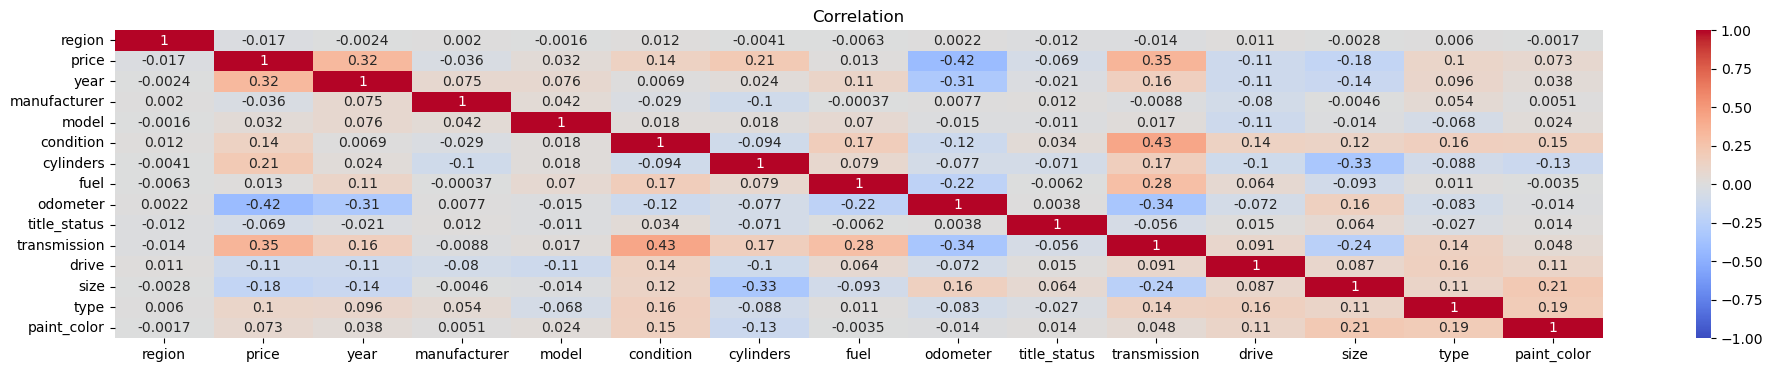

In [23]:
#Post impute and encoding visualization of correlation
num_columns = df_vehicle1.select_dtypes(include=['float64', 'int64','int32'])
# Create a correlation heatmap using just the numerical features
plt.figure(figsize=(24, 4))
sns.heatmap(num_columns.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation')
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [25]:
#Split data to train and test
# Define features (X) and target variable (y)

X = df_vehicle1.drop(['price'], axis=1)  # Features (excluding the target)
y = df_vehicle1['price']  # Scaled target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (285533, 14)
Test set size: (71384, 14)


In [27]:
#Scale and fit,transform training data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_vehicle1[['year', 'odometer']]) 

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [29]:
model = LinearRegression().fit(X_train_scaled,y_train)

In [31]:
#Baseline Prediction
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
mse_baseline_train = mean_squared_error(baseline_train,y_train)
mse_baseline_test = mean_squared_error(baseline_test,y_test)
print(baseline_train.shape, baseline_test.shape)
print(f'Baseline for training data: {mse_baseline_train}')
print(f'Baseline for testing data: {mse_baseline_test}')

(285533,) (71384,)
Baseline for training data: 172904080.01875484
Baseline for testing data: 172582447.6226933


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [33]:
y_pred = model.predict(X_test_scaled)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
#Determination Coefficient
print(f"R-squared (R²): {r2}")

Model Evaluation:
Mean Absolute Error (MAE): 8089.921633536004
Mean Squared Error (MSE): 115934567.77538289
R-squared (R²): 0.32823662329297976


region          -179.999277
year            2421.572851
manufacturer    -556.194111
model             52.904300
condition        709.186562
cylinders       1908.679645
fuel           -1903.091441
odometer       -3986.761726
title_status    -528.205189
transmission    2580.209568
drive          -1736.502731
size            -535.280226
type             663.622887
paint_color     1012.058773
dtype: float64


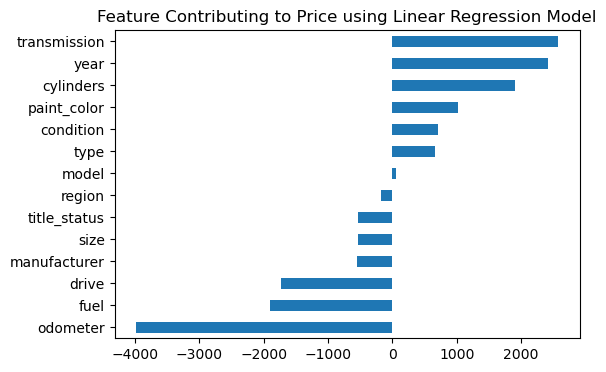

In [35]:
coef = pd.Series(model.coef_, index = X_train.columns)
print(coef)
featured_coef = coef.sort_values()
plt.figure(figsize=(6, 4))
featured_coef.plot(kind = "barh")
plt.title("Feature Contributing to Price using Linear Regression Model")
plt.savefig('Linear-Regression-Feature-Importance.jpg')
plt.show()

In [37]:
#FeatureSelection and preprocessing for cross validation
pipe = Pipeline([('scaler', scaler),
          ('linear', model)])
pipe.fit(X_train_scaled,y_train)
pipe.score(X_test_scaled,y_test)

0.32823662329297987

In [39]:
y_pred = pipe.predict(X_test_scaled)
rmse = metrics.root_mean_squared_error(y_test, y_pred)
print("Model Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Model Evaluation:
Root Mean Squared Error (RMSE): 10767.29157102114


RMSE is a measure of the average magnitude of error between the model's predictions and the actual values. In this case,
RMSE of 10767.29, indicates model is off by $10767 of the predicted used car price.

In [42]:
y_train.mean()


16824.40164534397

In [44]:
pipe.get_params()
param_grid = {
    'linear__copy_X': [True, False],
    'linear__fit_intercept': [True, False]
}
grid = GridSearchCV(pipe, param_grid, cv = 5, scoring = "neg_root_mean_squared_error")
grid.fit(X_train_scaled, y_train)
grid.best_score_
grid.cv_results_
grid.best_params_
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])

In [45]:
ypred = grid.best_estimator_.predict(X_test_scaled)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
r2 = r2_score(y_test, ypred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Model Evaluation:
Mean Absolute Error (MAE): 8089.921633536006
Mean Squared Error (MSE): 115934567.77538288
R-squared (R²): 0.32823662329297987


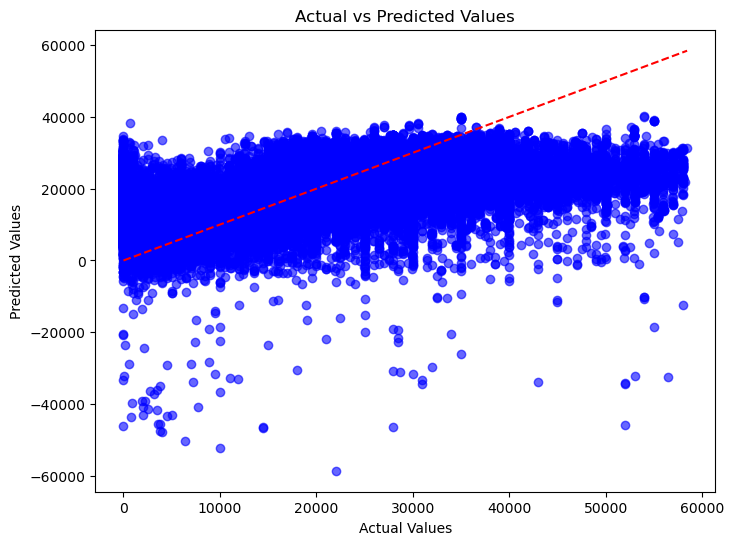

In [48]:
# Plotting actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # line for perfect predictions
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [50]:
#Ridge Regression Evaluation
ridge = Ridge(alpha=1.0)  #  alpha=1.0  is The regularization strength normally used
ridge.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 8089.923863848514
Mean Squared Error (MSE): 115934570.13188253
R-squared (R²): 0.32823660963863854


In [52]:
#Lasso Regression Evaluation
lasso = Lasso(alpha=1.0)  #  alpha=1.0  is The regularization strength normally used
lasso.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 8090.073516370369
Mean Squared Error (MSE): 115934885.38966405
R-squared (R²): 0.32823478293038477


Given that the RMSE is a bit high and the R² is only 0.32, the model is not perfect, but it already offers clear insights into which factors are driving used car prices. Based on further fine tuning other aspects of preprocessing the data and using additional SBERT embedding for tuining text , we would be able to provide more accurate insights on the model and sales price of used cars.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

Features used to determine the price of the used cars based on the LinearRegression model are:
*Transmission
*Year
*cylinders
*condition
*paint_color
*type
*model

In [56]:
def predict_usedcar_price(carsdataset, model, preprocessor):
    """
    Function to predict the medical costs of a new patient.

    Parameters:
    - carsdataset: Dictionary with the characteristics of the used cars.
    - model: Trained model used to make the prediction.
    - preprocessor: Preprocessor used to transform the data before training the model.

    Returns:
    - Prediction of the cars sale price
    """
    # Create a DataFrame with the used cars data
    vehicle_df = pd.DataFrame([vehicle])

    # Apply preprocessing (transform the cars dataset) to match the training data
    vehicle_processed = preprocessor.transform(vehicle_df)

    # Make the prediction using the trained model
    prediction = model.predict(vehicle_processed)

    return prediction[0]